# SRT - Ensayo

In [1]:
import random
import string
import pandas as pd
import numpy as np
from datetime import date

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

### Generador de datos

##### Codigo Postal

In [2]:
# Cantidad de codigos
n_codigos = 25000

# Define la longitud del código
longitud = 6

# Define los caracteres permitidos para el código alfanumérico
caracteres_permitidos = string.ascii_uppercase + string.digits

# Genera el código alfanumérico aleatorio de longitud 6
codigos = [ ''.join(random.choices(caracteres_permitidos, k=longitud)) for cod in range(n_codigos)]

# Repetir cada valor al menos 30 veces, maximo 40
repetidos = []
for codigo in codigos:
    repetidos.extend([codigo] * max(30, random.randint(1, 40)))

#### Año, Mes y Total

In [3]:
anios = [2020, 2021, 2022]
registros = list()
for anio in anios:   
    for codigo in codigos:
        for m in range(1,13):
            total = random.randint(10,20*int((40+anio*m)/anio))
            registros.append( [codigo, anio, m, total] )  
            

In [4]:
len(registros)

900000

In [5]:
registros[:16]

[['M06LDN', 2020, 1, 13],
 ['M06LDN', 2020, 2, 27],
 ['M06LDN', 2020, 3, 21],
 ['M06LDN', 2020, 4, 13],
 ['M06LDN', 2020, 5, 20],
 ['M06LDN', 2020, 6, 23],
 ['M06LDN', 2020, 7, 19],
 ['M06LDN', 2020, 8, 160],
 ['M06LDN', 2020, 9, 90],
 ['M06LDN', 2020, 10, 92],
 ['M06LDN', 2020, 11, 15],
 ['M06LDN', 2020, 12, 25],
 ['2Y0CNQ', 2020, 1, 14],
 ['2Y0CNQ', 2020, 2, 21],
 ['2Y0CNQ', 2020, 3, 44],
 ['2Y0CNQ', 2020, 4, 55]]

### Armar Dataframe

In [6]:
df = pd.DataFrame(registros, columns=['codigo','año','mes','total_cp'])

In [7]:
df

,codigo,año,mes,total_cp
0,M06LDN,2020,1,13
1,M06LDN,2020,2,27
2,M06LDN,2020,3,21
3,M06LDN,2020,4,13
4,M06LDN,2020,5,20
...,...,...,...,...
899995,1IZ0DS,2022,8,113
899996,1IZ0DS,2022,9,65
899997,1IZ0DS,2022,10,192
899998,1IZ0DS,2022,11,100


In [8]:
df.sort_values(['año','mes'], ascending=True)

,codigo,año,mes,total_cp
0,M06LDN,2020,1,13
12,2Y0CNQ,2020,1,14
24,AIXNJ6,2020,1,16
36,YEZ6BU,2020,1,18
48,5YK0NU,2020,1,12
...,...,...,...,...
899951,I97J6O,2022,12,83
899963,X9PBQ4,2022,12,156
899975,NTSYAN,2022,12,164
899987,8G243K,2022,12,167


### EDA

### Transformacion

#### LabelEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# Crear una instancia de OneHotEncoder
encoder = LabelEncoder()

In [11]:
# Codificar los valores alfanuméricos
X_encoded = encoder.fit_transform(df.codigo.values.reshape(-1,))

In [ ]:
X_encoded.shape

In [ ]:
pd.DataFrame(X_encoded)

#### Embeddings

In [ ]:
tamano_embedding = 10

In [ ]:
matriz_embedding = np.random.rand(len(encoder.classes_), tamano_embedding)

In [ ]:
matriz_embedding

In [ ]:
encoder.classes_

In [ ]:
# Vectores de embeddings asociados a un valor por cada atributo
atributos_embeddings = matriz_embedding[X_encoded]

In [ ]:
atributos_embeddings.shape

#### Verificacion embeddings

In [20]:
i = 0
encoder.classes_[i]

'001V87'

In [21]:
matriz_embedding[i]

array([0.29744899, 0.27497744, 0.64862432, 0.67595663, 0.17390903,
       0.47261749, 0.1258883 , 0.16153685, 0.58316714, 0.84929386])

In [22]:
matriz_embedding.shape

(25000, 10)

#### Dataframe con datos de embeddings

In [23]:
# Creamos un nuevo dataframe con los valores del embedding
embedding_df = pd.DataFrame(matriz_embedding, columns=[f'emb_{i}' for i in range(matriz_embedding.shape[1])])

In [24]:
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9
0,0.297449,0.274977,0.648624,0.675957,0.173909,0.472617,0.125888,0.161537,0.583167,0.849294
1,0.089196,0.906788,0.243349,0.137307,0.926426,0.561627,0.433005,0.232028,0.934999,0.546102
2,0.560399,0.963251,0.742517,0.155754,0.190474,0.028646,0.349934,0.138415,0.323519,0.372788
3,0.767286,0.409692,0.727308,0.904693,0.450243,0.919257,0.578648,0.805719,0.114352,0.758453
4,0.083864,0.778435,0.187799,0.160875,0.821449,0.058446,0.362842,0.754470,0.962026,0.705629
...,...,...,...,...,...,...,...,...,...,...
24995,0.309591,0.679558,0.812055,0.714886,0.264954,0.599621,0.184636,0.308509,0.461719,0.905247
24996,0.147561,0.173712,0.044156,0.591177,0.566242,0.825085,0.025059,0.473986,0.298238,0.338389
24997,0.719697,0.373615,0.927782,0.063322,0.612346,0.759787,0.595106,0.414037,0.240185,0.212620
24998,0.896747,0.898080,0.978396,0.204061,0.199657,0.710425,0.530923,0.788751,0.386895,0.188192


In [25]:
embedding_df['codigo'] = encoder.classes_

In [26]:
# Utilizamos el codigo como indice (para joinear)
embedding_df = embedding_df.set_index('codigo')
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9
codigo,,,,,,,,,,
001V87,0.297449,0.274977,0.648624,0.675957,0.173909,0.472617,0.125888,0.161537,0.583167,0.849294
0081XB,0.089196,0.906788,0.243349,0.137307,0.926426,0.561627,0.433005,0.232028,0.934999,0.546102
0083ZO,0.560399,0.963251,0.742517,0.155754,0.190474,0.028646,0.349934,0.138415,0.323519,0.372788
008LLB,0.767286,0.409692,0.727308,0.904693,0.450243,0.919257,0.578648,0.805719,0.114352,0.758453
00A740,0.083864,0.778435,0.187799,0.160875,0.821449,0.058446,0.362842,0.754470,0.962026,0.705629
...,...,...,...,...,...,...,...,...,...,...
ZZPSR0,0.309591,0.679558,0.812055,0.714886,0.264954,0.599621,0.184636,0.308509,0.461719,0.905247
ZZPWJJ,0.147561,0.173712,0.044156,0.591177,0.566242,0.825085,0.025059,0.473986,0.298238,0.338389
ZZWXBF,0.719697,0.373615,0.927782,0.063322,0.612346,0.759787,0.595106,0.414037,0.240185,0.212620


In [27]:
# Utilizamos el codigo como indice (para joinear)
df = df.set_index('codigo')
df

,año,mes,total_cp
codigo,,,
M06LDN,2020,1,13
M06LDN,2020,2,27
M06LDN,2020,3,21
M06LDN,2020,4,13
M06LDN,2020,5,20
...,...,...,...
1IZ0DS,2022,8,113
1IZ0DS,2022,9,65
1IZ0DS,2022,10,192


#### Transformar la variable de salida

In [28]:
mmscaler = MinMaxScaler()

In [29]:
df['total_cp'] = mmscaler.fit_transform(df['total_cp'].values.reshape(-1,1))

In [30]:
df.head()

,año,mes,total_cp
codigo,,,
M06LDN,2020,1,0.013043
M06LDN,2020,2,0.073913
M06LDN,2020,3,0.047826
M06LDN,2020,4,0.013043
M06LDN,2020,5,0.043478


#### Joins de Dataframes

In [31]:
df_join = embedding_df.join(df, lsuffix='_izq', rsuffix='_der')
df_join

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
codigo,,,,,,,,,,,,,
001V87,0.297449,0.274977,0.648624,0.675957,0.173909,0.472617,0.125888,0.161537,0.583167,0.849294,2020,1,0.030435
001V87,0.297449,0.274977,0.648624,0.675957,0.173909,0.472617,0.125888,0.161537,0.583167,0.849294,2020,2,0.013043
001V87,0.297449,0.274977,0.648624,0.675957,0.173909,0.472617,0.125888,0.161537,0.583167,0.849294,2020,3,0.100000
001V87,0.297449,0.274977,0.648624,0.675957,0.173909,0.472617,0.125888,0.161537,0.583167,0.849294,2020,4,0.247826
001V87,0.297449,0.274977,0.648624,0.675957,0.173909,0.472617,0.125888,0.161537,0.583167,0.849294,2020,5,0.378261
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZZLCR,0.295440,0.702911,0.020923,0.733971,0.242732,0.951183,0.489064,0.179711,0.114551,0.212473,2022,8,0.147826
ZZZLCR,0.295440,0.702911,0.020923,0.733971,0.242732,0.951183,0.489064,0.179711,0.114551,0.212473,2022,9,0.069565
ZZZLCR,0.295440,0.702911,0.020923,0.733971,0.242732,0.951183,0.489064,0.179711,0.114551,0.212473,2022,10,0.669565


#### Datos de entrenamiento

In [32]:
df_final = df_join.reset_index()
df_final

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
0,001V87,0.297449,0.274977,0.648624,0.675957,0.173909,0.472617,0.125888,0.161537,0.583167,0.849294,2020,1,0.030435
1,001V87,0.297449,0.274977,0.648624,0.675957,0.173909,0.472617,0.125888,0.161537,0.583167,0.849294,2020,2,0.013043
2,001V87,0.297449,0.274977,0.648624,0.675957,0.173909,0.472617,0.125888,0.161537,0.583167,0.849294,2020,3,0.100000
3,001V87,0.297449,0.274977,0.648624,0.675957,0.173909,0.472617,0.125888,0.161537,0.583167,0.849294,2020,4,0.247826
4,001V87,0.297449,0.274977,0.648624,0.675957,0.173909,0.472617,0.125888,0.161537,0.583167,0.849294,2020,5,0.378261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,ZZZLCR,0.295440,0.702911,0.020923,0.733971,0.242732,0.951183,0.489064,0.179711,0.114551,0.212473,2022,8,0.147826
899996,ZZZLCR,0.295440,0.702911,0.020923,0.733971,0.242732,0.951183,0.489064,0.179711,0.114551,0.212473,2022,9,0.069565
899997,ZZZLCR,0.295440,0.702911,0.020923,0.733971,0.242732,0.951183,0.489064,0.179711,0.114551,0.212473,2022,10,0.669565
899998,ZZZLCR,0.295440,0.702911,0.020923,0.733971,0.242732,0.951183,0.489064,0.179711,0.114551,0.212473,2022,11,0.500000


In [33]:
X_data = df_final.drop(['codigo','total_cp'], axis=1).to_numpy()

In [34]:
X_data.shape

(900000, 12)

In [35]:
y_data = df_final['total_cp'].to_numpy()

In [36]:
y_data

array([0.03043478, 0.01304348, 0.1       , ..., 0.66956522, 0.5       ,
       0.24782609])

In [37]:
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.30, random_state=43) 

### Modelo

In [38]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

### Validacion

In [39]:
pred_train = modelo.predict(X_train)
pred_test = modelo.predict(X_test)

##### RMSE

In [40]:
mse_train = mean_squared_error(y_train, pred_train)
mse_test  = mean_squared_error(y_test, pred_test)

In [41]:
mse_train, mse_test

(0.030543744900418078, 0.030700112997528253)

In [42]:
rmse_train = np.sqrt(mse_train)
rmse_test  = np.sqrt(mse_test)
print('RMSE:', round(rmse_train,4), round(rmse_test,4))

RMSE: 0.1748 0.1752


##### R2 Score

In [55]:
score = r2_score(y_test, pred_test)
print(f'R2 score: {score:.5f}')

R2 score: 0.42388


### Prediccion

In [43]:
# Ingresar codigo
codigo_in = random.choice(encoder.classes_) 
new_codigo_in = encoder.transform([codigo_in])
new_codigo_embedding = matriz_embedding[new_codigo_in]


In [44]:
# Ingresar año y mes
anio_in = 2022
mes_in = 10

In [45]:
atributos_in = np.concatenate((new_codigo_embedding, anio_in, mes_in), axis=None)

In [46]:
atributos_in = atributos_in.reshape(1, 12)

In [47]:
pred = modelo.predict(atributos_in)

In [48]:
print(f"Prediccion para el código {codigo_in} Año {anio_in} Mes {mes_in}: {np.round(pred[0],2)*100} incidentes")

Prediccion para el código 9M2NAV Año 2022 Mes 10: 41.0 incidentes


### Verificacion grafica

In [49]:
filtro = df_final['codigo'] == codigo_in
df_filtrado = df_final[filtro]
df_filtrado

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
241200,9M2NAV,0.694646,0.763881,0.08776,0.67085,0.472468,0.763515,0.785242,0.562905,0.670779,0.528763,2020,1,0.026087
241201,9M2NAV,0.694646,0.763881,0.08776,0.67085,0.472468,0.763515,0.785242,0.562905,0.670779,0.528763,2020,2,0.030435
241202,9M2NAV,0.694646,0.763881,0.08776,0.67085,0.472468,0.763515,0.785242,0.562905,0.670779,0.528763,2020,3,0.160870
241203,9M2NAV,0.694646,0.763881,0.08776,0.67085,0.472468,0.763515,0.785242,0.562905,0.670779,0.528763,2020,4,0.178261
241204,9M2NAV,0.694646,0.763881,0.08776,0.67085,0.472468,0.763515,0.785242,0.562905,0.670779,0.528763,2020,5,0.291304
241205,9M2NAV,0.694646,0.763881,0.08776,0.67085,0.472468,0.763515,0.785242,0.562905,0.670779,0.528763,2020,6,0.321739
241206,9M2NAV,0.694646,0.763881,0.08776,0.67085,0.472468,0.763515,0.785242,0.562905,0.670779,0.528763,2020,7,0.347826
241207,9M2NAV,0.694646,0.763881,0.08776,0.67085,0.472468,0.763515,0.785242,0.562905,0.670779,0.528763,2020,8,0.256522
241208,9M2NAV,0.694646,0.763881,0.08776,0.67085,0.472468,0.763515,0.785242,0.562905,0.670779,0.528763,2020,9,0.143478
241209,9M2NAV,0.694646,0.763881,0.08776,0.67085,0.472468,0.763515,0.785242,0.562905,0.670779,0.528763,2020,10,0.013043


In [50]:
df_filtrado = df_filtrado.sort_values(['año','mes'], ascending=True)

In [51]:
fechas = []
totales = []

for row in df_filtrado.iterrows():
    fechas.append(str(row[1][11])+'-'+str(row[1][12])+'-01')
    totales.append(row[1][13]*100)

In [52]:
fechas[0]

'2020-1-01'

In [53]:
df_graf = pd.DataFrame({'fechas':fechas, 'totales':totales})

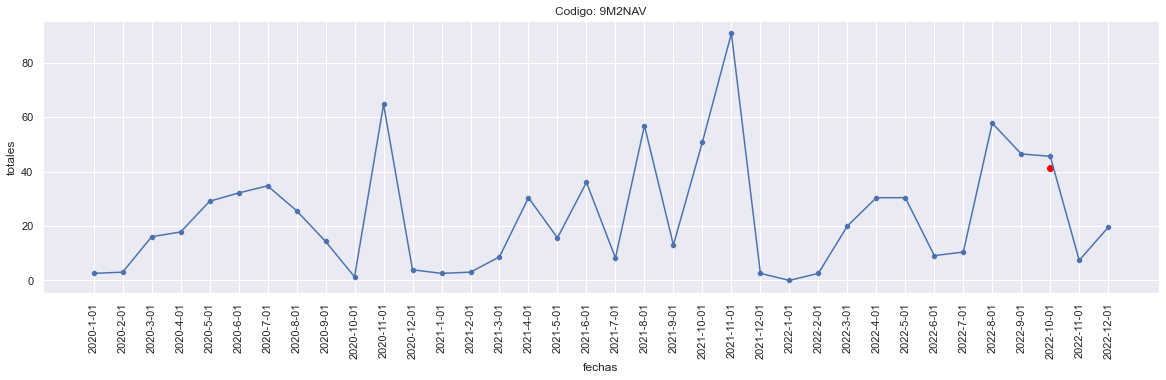

In [54]:
plt.figure(figsize=(20, 5))
sns.set(color_codes=True)
plt.xticks(rotation=90)
sns.scatterplot(x='fechas', y='totales', data=df_graf)
plt.scatter(x=(str(anio_in)+'-'+str(mes_in)+'-01'), y=pred*100, color='red')
plt.plot(df_graf.fechas, df_graf.totales)
plt.title("Codigo: "+codigo_in)
plt.show()